In [ ]:
# Remote Internship - DataScience - Aisha Nawaz - Week 05 - Day02
# Project 2: Customer Churn Prediction for Telecommunications Company

# Client Name: CommLink Telecom
# Company Name: DataSense Solutions

# Description: CommLink Telecom, a telecommunications company, is facing high customer churn rates 
# and wants to address the issue proactively. They have engaged DataSense Solutions 
# to build a customer churn prediction model that can identify customers likely to churn in the near future. 
# This will enable them to take targeted retention measures and improve customer retention rates.

# Dataset: CommLink_Telecom_Customer_Data.csv

# | CustomerID | Gender | Age | ServiceLength (months) | ContractType | MonthlyCharges (USD) | TotalCharges (USD) | Churn |
# |------------|--------|-----|-----------------------|--------------|---------------------|--------------------|-------|
# | 1001       | Male   | 42  | 24                    | Two-Year     | 85.00               | 2040.00            | No    |
# | 1002       | Female | 35  | 12                    | One-Year     | 79.50               | 942.50             | Yes   |
# | 1003       | Male   | 62  | 48                    | Month-to-Month | 94.20              | 4567.75            | Yes   |
# | 1004       | Female | 52  | 36                    | One-Year     | 78.25               | 2853.50            | No    |
# | 1005       | Male   | 28  | 6                     | Month-to-Month | 68.75              | 452.25             | No    |
# | ...        | ...    | ... | ...                   | ...          | ...                 | ...                | ...   |
# (Note: The dataset contains a total of 1000 customers with some churned (Yes) and others active (No).)

In [75]:
# Steps:
#1) Data Collection: create data set
import pandas as pd
import random
#Generating dataset entirely randomly gives very poor results while analysing data (as its totally random)
#Hence I am changing my approach to creating dataset a bit

size=1010
CommLinkTelecomData={
    'CustomerID':[1001,1002,1003,1004,1005]+[1002,1003,None]+[i for i in range (1006,1006+size-3) ],
    'Gender':['Male','Female','Male','Female','Male']+['Male' for _ in range(750)]+['Female' for _ in range (260)],
    'Age':[42,35,62,52,28]+[int(random.randint(1,100)) for i in range(500)]+[int(random.randint(20,40)) for i in range(510)],
    'ServiceLength (months)':[24,12,48,36,6]+[random.randint(1,90) for i in range (size-5)]+[-10]+[None for i in range(4)],
    'ContractType':['Two-Year','One-Year','Month-to-Month','One-Year','Month-to-Month']+[random.choice(['Two-Year','One-Year','Month-to-Month'])for i in range (500)]+['One-Year' for i in range (507)]+[None for _ in range (3) ],
    'MonthlyCharges (USD)':[85.00,79.50,94.20,78.25, 68.75]+[random.randint(30,80) for i  in range (500)]+[random.randint(50,100) for i in range (509)]+[None],
    'TotalCharges (USD)':[2040.00,942.50,4567.75,2853.50,452.25]+[random.randint(400,5000) for i  in range (500)]+[random.randint(2000,4000) for i  in range (508)]+[None,None],
    'Churn':['No','Yes','Yes','No','No']+[random.choice(['No','Yes']) for i in range(499)]+['Cjo','sfsda']+['Yes' for i in range(509)]
}
dataSET=pd.DataFrame(CommLinkTelecomData)
dataSET.to_csv('CommLink_Telecom_Customer_Data.csv',index=False) #Saving to csv file
dataSET.tail()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
1010,2008.0,Female,27,-10.0,One-Year,76.0,2994.0,Yes
1011,2009.0,Female,35,NaN,One-Year,87.0,3602.0,Yes
1012,2010.0,Female,24,NaN,None,84.0,2060.0,Yes
1013,2011.0,Female,38,NaN,None,76.0,NaN,Yes
1014,2012.0,Female,25,NaN,None,NaN,NaN,Yes


In [76]:
#2) Data Cleaning: Handle missing values, duplicates, and any inconsistencies in the dataset.
dataClean=pd.read_csv('CommLink_Telecom_Customer_Data.csv')
dataClean.isnull().sum()  #Checking fo null/missing values

CustomerID                1
Gender                    0
Age                       0
ServiceLength (months)    4
ContractType              3
MonthlyCharges (USD)      1
TotalCharges (USD)        2
Churn                     0
dtype: int64

In [77]:
dataClean.dropna(inplace=True) #Dropping null values
dataClean.isnull().sum() #Confirming no more null values left

CustomerID                0
Gender                    0
Age                       0
ServiceLength (months)    0
ContractType              0
MonthlyCharges (USD)      0
TotalCharges (USD)        0
Churn                     0
dtype: int64

In [78]:
duplicates=dataClean.duplicated(subset='CustomerID',keep=False) #Checking for duplicate values (Only CustomerID should be unique)
dataClean[duplicates] #Printing duplicates

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
1,1002.0,Female,35,12.0,One-Year,79.5,942.50,Yes
2,1003.0,Male,62,48.0,Month-to-Month,94.2,4567.75,Yes
5,1002.0,Male,44,17.0,Month-to-Month,42.0,2525.00,Yes
6,1003.0,Male,8,89.0,Two-Year,36.0,1417.00,Yes


In [79]:
dataClean.drop_duplicates(subset=['CustomerID'],inplace=True) #Dropping duplicates

In [80]:
duplicates=dataClean.duplicated(subset='CustomerID',keep=False) # Confirming all duplicates removed
dataClean[duplicates] #Should print nothing

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn


In [81]:
dataClean.describe() #Finding inconsistencies in data

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD)
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,1504.500000,39.499008,45.533730,65.051290,2795.804563
std,291.128837,22.734467,25.066602,17.961861,1012.064574
min,1001.000000,1.000000,-10.000000,30.000000,404.000000
25%,1252.750000,25.000000,24.000000,52.750000,2129.500000
50%,1504.500000,33.000000,45.000000,66.000000,2852.500000
75%,1756.250000,48.000000,66.000000,77.000000,3550.000000
max,2008.000000,100.000000,90.000000,100.000000,5000.000000


In [82]:
# As seen above there is a negative value,-10 in ServiceLength col which is inconsistent and should be removed
dataClean=dataClean.loc[dataClean['ServiceLength (months)']>=0]
dataClean.describe() #Confiriming inconsistent values in numerical columns are removed

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD)
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1504.000000,39.511420,45.588878,65.040417,2795.607746
std,290.840162,22.742347,25.017803,17.967468,1012.548163
min,1001.000000,1.000000,1.000000,30.000000,404.000000
25%,1252.500000,25.000000,24.000000,52.500000,2129.000000
50%,1504.000000,33.000000,45.000000,66.000000,2852.000000
75%,1755.500000,48.000000,66.000000,77.000000,3550.000000
max,2007.000000,100.000000,90.000000,100.000000,5000.000000


In [83]:
dataClean['ContractType'].value_counts()  #Checking for inconsistent values in categorical columns

One-Year          676
Two-Year          173
Month-to-Month    158
Name: ContractType, dtype: int64

In [84]:
dataClean['Gender'].value_counts()

Male      750
Female    257
Name: Gender, dtype: int64

In [85]:
dataClean['Churn'].value_counts() #Churn column values can be only Yes or No, but there seems to be other values too

Yes      732
No       273
Cjo        1
sfsda      1
Name: Churn, dtype: int64

In [89]:
dataClean=dataClean.loc[(dataClean['Churn']=='Yes') | (dataClean['Churn']=='No')] #Removing inconsistent values in Churn col
dataClean['Churn'].value_counts() #Confirming removal

Yes    732
No     273
Name: Churn, dtype: int64

In [94]:
dataClean.info() #Confirming size of data after cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1005 non-null   float64
 1   Gender                  1005 non-null   object 
 2   Age                     1005 non-null   int64  
 3   ServiceLength (months)  1005 non-null   float64
 4   ContractType            1005 non-null   object 
 5   MonthlyCharges (USD)    1005 non-null   float64
 6   TotalCharges (USD)      1005 non-null   float64
 7   Churn                   1005 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 70.7+ KB


In [91]:
dataClean.to_csv('CommLink_Telecom_Customer_Data_Cleaned.csv',index=False) #Saving Cleaned data for later use

In [101]:
#3) Data Preprocessing: Encode categorical variables, perform feature scaling, and handle skewed data.

dataPreprocessed=pd.read_csv('CommLink_Telecom_Customer_Data_Cleaned.csv')

#Applying one-hot encoding on all categorical Columns:   [ENCODE]
CatCols=['Gender','Churn','ContractType']
dataPreprocessed=pd.get_dummies(dataPreprocessed,columns=CatCols)

#Performing min-max scaling on all relevant numerical columns  [FEATURE SCALING]
from sklearn.preprocessing import MinMaxScaler
numCols=['Age','ServiceLength (months)','MonthlyCharges (USD)','TotalCharges (USD)']
scaler=MinMaxScaler()
dataPreprocessed[numCols]=scaler.fit_transform(dataPreprocessed[numCols])

dataPreprocessed.head()

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD),Gender_Female,Gender_Male,Churn_No,Churn_Yes,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year
0,1001.0,0.414141,0.258427,0.785714,0.355962,0,1,1,0,0,0,1
1,1002.0,0.343434,0.123596,0.707143,0.117167,1,0,0,1,0,1,0
2,1003.0,0.616162,0.528090,0.917143,0.905951,0,1,0,1,1,0,0
3,1004.0,0.515152,0.393258,0.689286,0.532963,1,0,1,0,0,1,0
4,1005.0,0.272727,0.056180,0.553571,0.010498,0,1,1,0,1,0,0


In [103]:
#Handling skewed Data [SKEWED DATA]
from scipy import stats
# Checking the skewness of each numeric column using stats
skewness = dataPreprocessed[numCols].apply(lambda x: stats.skew(x))
print(skewness)

Age                       1.011608
ServiceLength (months)    0.024805
MonthlyCharges (USD)      0.000133
TotalCharges (USD)       -0.249645
dtype: float64


In [106]:
#Applying logarithm transformation on all columns that have high skewness i.e their absolute value of skewness is > 0.5 
import numpy as np
for col in numCols:
    if skewness[col] > 0.5:
        print('Applying logarithm transformation on column: ',col)
        dataPreprocessed[col] = np.log1p(dataPreprocessed[col])

Applying logarithm transformation on column:  Age


In [107]:
dataPreprocessed.to_csv('CommLink_Telecom_Customer_Data_Preprocessed.csv',index=False) #Saving preprocessed data for later use

In [177]:
#4)  Exploratory Data Analysis: Explore the dataset using Python libraries 
# (e.g., Pandas, Matplotlib, Seaborn) to understand factors contributing to churn.
data=pd.read_csv('CommLink_Telecom_Customer_Data_Preprocessed.csv')
data2=pd.read_csv('CommLink_Telecom_Customer_Data_Cleaned.csv')
import matplotlib.pyplot as plt
data.describe()

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD),Gender_Female,Gender_Male,Churn_No,Churn_Yes,ContractType_Month-to-Month,ContractType_One-Year,ContractType_Two-Year
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,1504.002985,0.315708,0.501314,0.500422,0.520634,0.255721,0.744279,0.271642,0.728358,0.157214,0.671642,0.171144
std,291.129691,0.156477,0.281281,0.256695,0.220200,0.436483,0.436483,0.445028,0.445028,0.364184,0.469850,0.376823
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1252.000000,0.217065,0.258427,0.314286,0.375544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1505.000000,0.280077,0.494382,0.514286,0.532637,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1756.000000,0.388487,0.730337,0.671429,0.684508,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2007.000000,0.693147,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


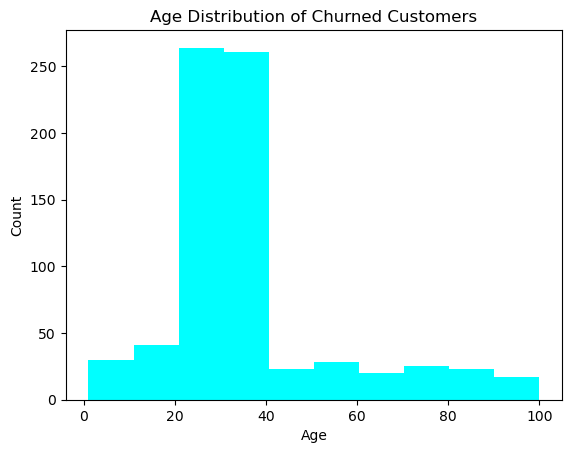

In [171]:
#Visualizing age distribution
dataChurned=data2.loc[data2['Churn']=='Yes']
plt.hist(x=dataChurned['Age'],color='Cyan')
plt.title('Age Distribution of Churned Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

More of the churned customers belong to age group 20-40.


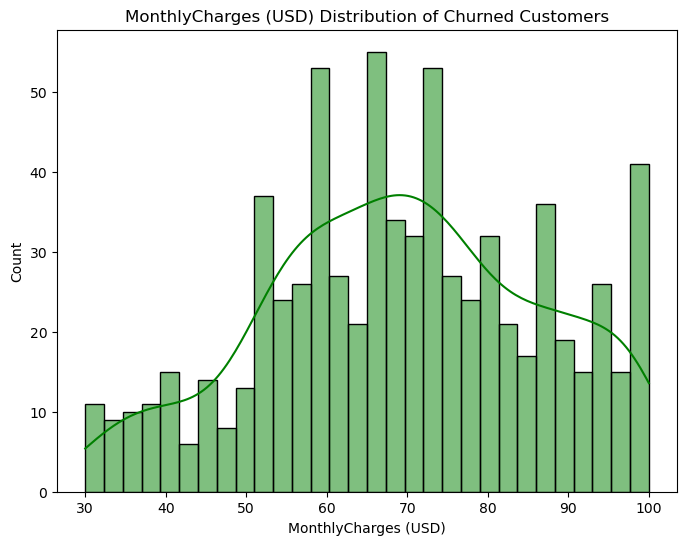

In [172]:
#Visualizing MonthlyCharges (USD) distribution
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=dataChurned, x='MonthlyCharges (USD)', kde=True, bins=30,color='Green')
plt.title('MonthlyCharges (USD) Distribution of Churned Customers')
plt.xlabel('MonthlyCharges (USD)')
plt.show()

Most of the churned users monthly charges are around 65 dollars. The company can reduce these to make sure they do not lose more customers. 

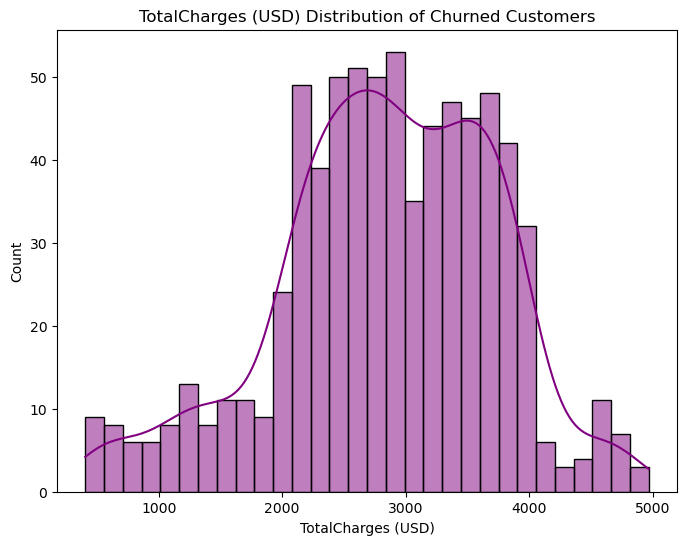

In [173]:
# Visualizing TotalCharges (USD) distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=dataChurned, x='TotalCharges (USD)', kde=True, bins=30,color='Purple')
plt.title('TotalCharges (USD) Distribution of Churned Customers')
plt.xlabel('TotalCharges (USD)')
plt.show()

Total Charges are mainly around $3000 which can be reduced by the company to retain customers.

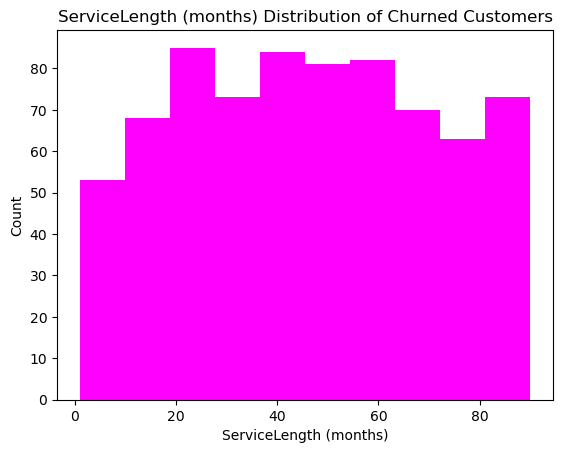

In [174]:
#Visualizing ServiceLength (months) distribution
plt.hist(x=dataChurned['ServiceLength (months)'],color='Magenta')
plt.title('ServiceLength (months) Distribution of Churned Customers')
plt.ylabel('Count')
plt.xlabel('ServiceLength (months)')
plt.show()

Most of churned users had service for around 20 months.

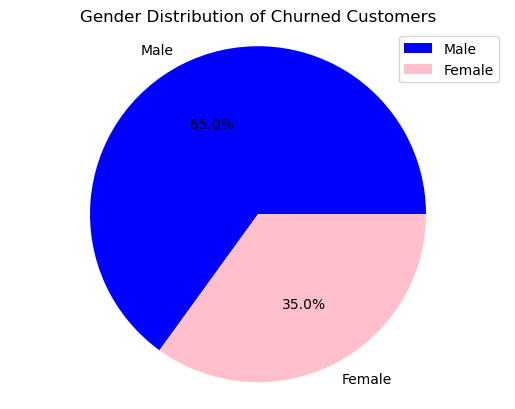

In [179]:
#Visualizing Gender Distribution
dataC=data.loc[data['Churn_Yes']==1]
countGender=[dataC['Gender_Male'].sum(),dataC['Gender_Female'].sum()]
plt.pie(x=countGender,labels=['Male','Female'],autopct='%1.1f%%',colors=['Blue','Pink'])
plt.title('Gender Distribution of Churned Customers')
plt.legend()
plt.axis('equal')
plt.show()

There are way more Male churned cutomers than female

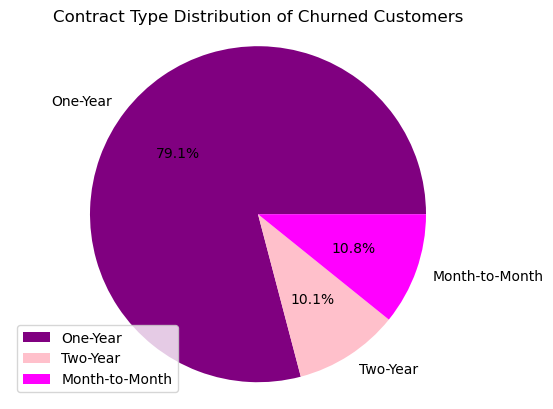

In [180]:
#Visualizing Contract Type Distribution
countContractType=[dataC['ContractType_One-Year'].sum(),dataC['ContractType_Two-Year'].sum(),dataC['ContractType_Month-to-Month'].sum()]
plt.pie(x=countContractType,labels=['One-Year','Two-Year','Month-to-Month'],autopct='%1.1f%%',colors=['Purple','Pink','Magenta'])
plt.title('Contract Type Distribution of Churned Customers')
plt.legend()
plt.axis('equal')
plt.show()

The customers who left used mostly the One-Year contract. 

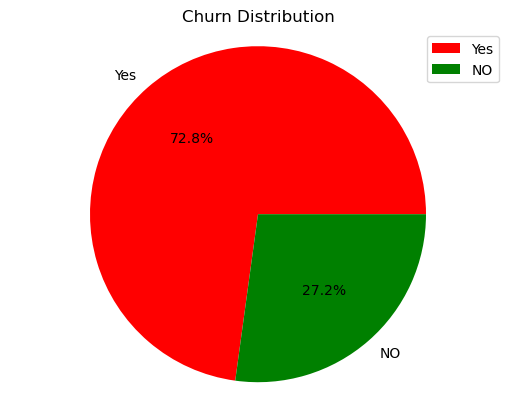

In [133]:
#Visualizing Churn Distribution
countChurn=[data['Churn_Yes'].sum(),data['Churn_No'].sum()]
plt.pie(x=countChurn,labels=['Yes','NO'],autopct='%1.1f%%',colors=['Red','Green'])
plt.title('Churn Distribution')
plt.legend()
plt.axis('equal')
plt.show()

There are around 72 % churned customers. A very high number for any company.

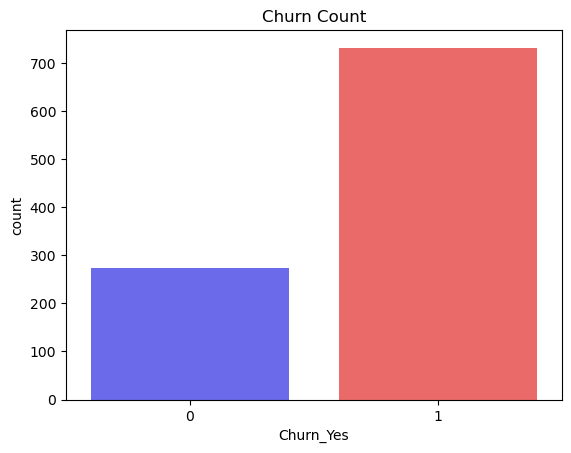

1    0.728358
0    0.271642
Name: Churn_Yes, dtype: float64


In [169]:
# Counting the number of churned and non-churned customers [ALTERNATIVE OPTION TO ABOVE]
sns.countplot(x='Churn_Yes', data=data,palette='seismic')
plt.title('Churn Count')
plt.show()

# Calculate the churn rate
churn_rate = data['Churn_Yes'].value_counts(normalize=True)
print(churn_rate)

Around 700 customers out of 1000 have churned

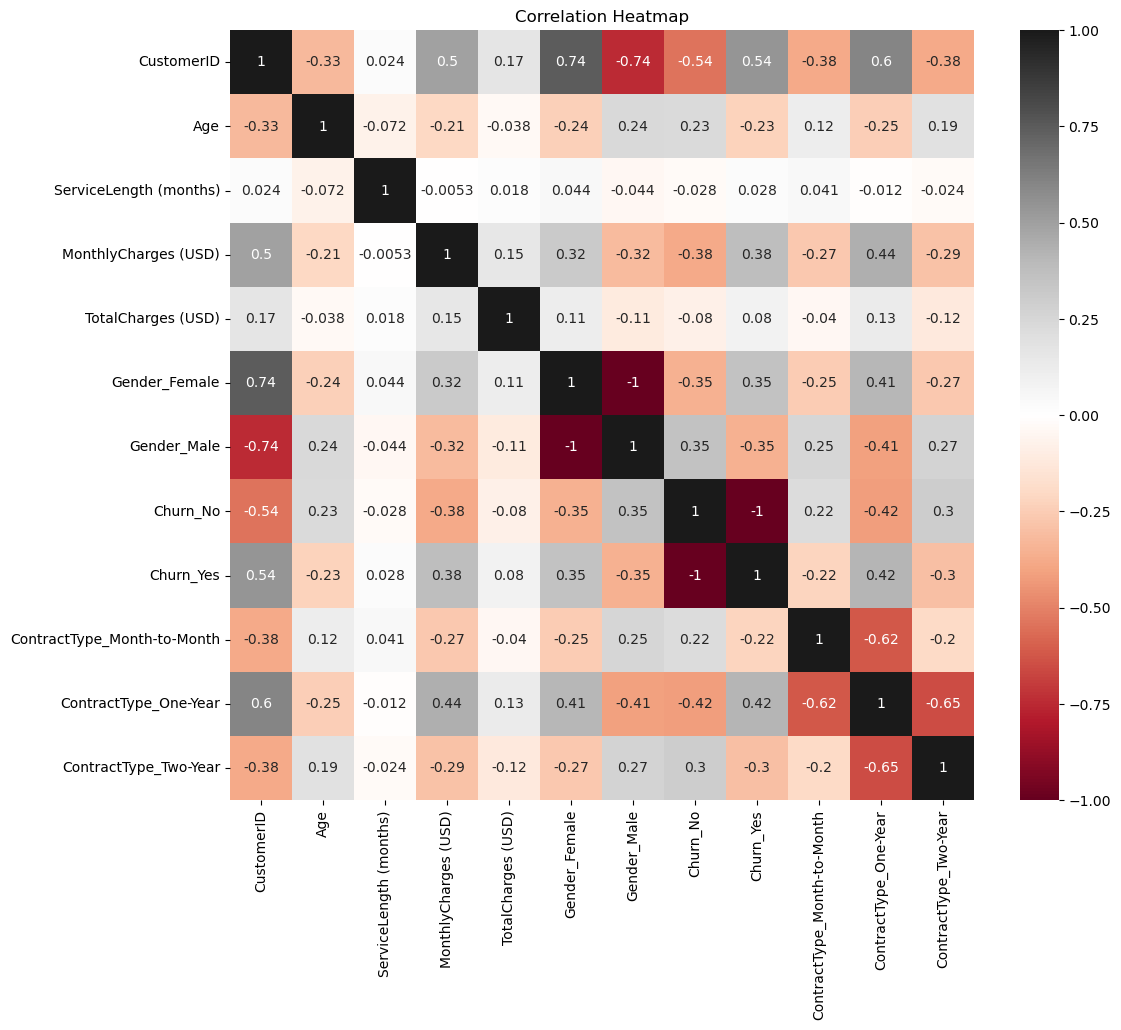

In [147]:
# Plotting the heatmap to visualize correlations
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='RdGy')
plt.title('Correlation Heatmap')
plt.show()

CommLink Telecom's churned customers seem to have been mainly male and had one-year contract.

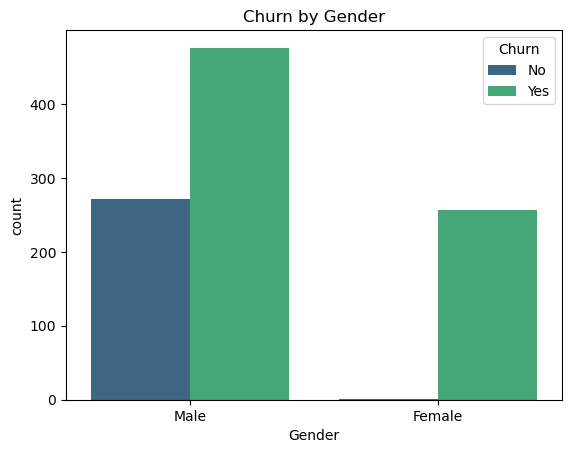

In [151]:
# Relationship between Gender and Churn
sns.countplot(x='Gender', hue='Churn', data=data2,palette='viridis')
plt.title('Churn by Gender')
plt.show()

Most of CommLink Telecom's female customers have churned, however mainly the churned customers are male as the company had overall more male customers.

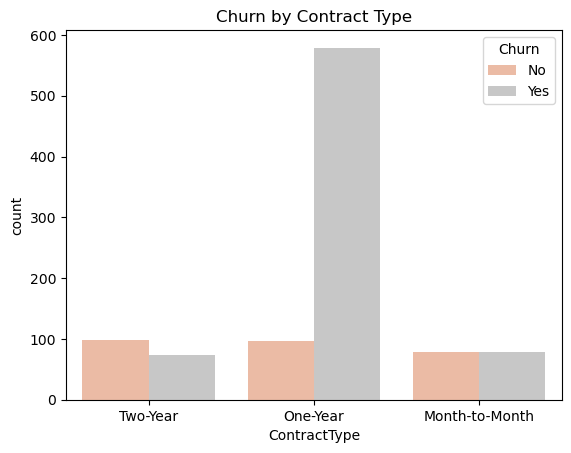

In [155]:
# Relationship between ContractType and Churn
sns.countplot(x='ContractType', hue='Churn', data=data2,palette='RdGy')
plt.title('Churn by Contract Type')
plt.show()

CommLink Telecom's customers having month-to-month contract were equally likely to churn. However more one-year contract type customer's churned.

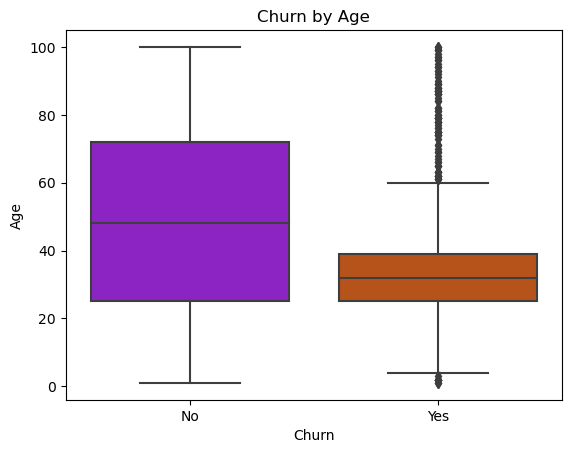

In [164]:
# Relationship between Age and Churn
sns.boxplot(x='Churn', y='Age', data=data2,palette='gnuplot')
plt.title('Churn by Age')
plt.show()

CommLink Telecom's customers with age range 20-40 have mainly churned. It suggests they need to target people in this age range and attract them long enough.

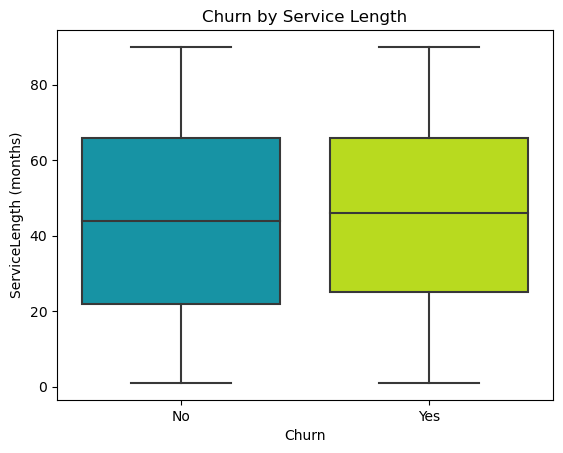

In [165]:
# Relationship between ServiceLength and Churn
sns.boxplot(x='Churn', y='ServiceLength (months)', data=data2,palette='nipy_spectral')
plt.title('Churn by Service Length')
plt.show()

CommLink Telecom's churned cutomers had service length of around 40-50 months.

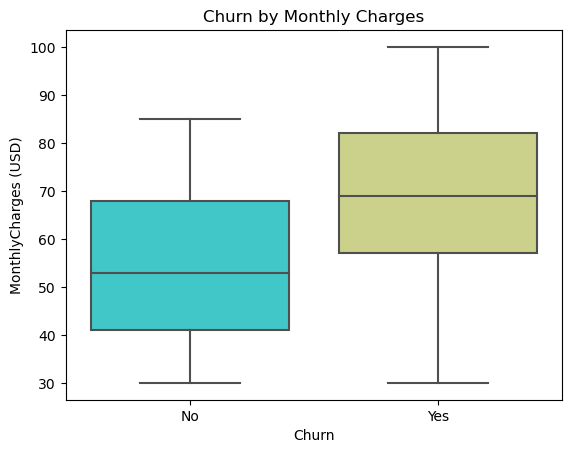

In [166]:
# Relationship between MonthlyCharges and Churn
sns.boxplot(x='Churn', y='MonthlyCharges (USD)', data=data2,palette='rainbow')
plt.title('Churn by Monthly Charges')
plt.show()


CommLink Telecom's customers that churned had high monthly prices than those that didn't. It suggests that they need to lower the prices to retain customers in the future. Churned customers had monthly charges mainly around $70

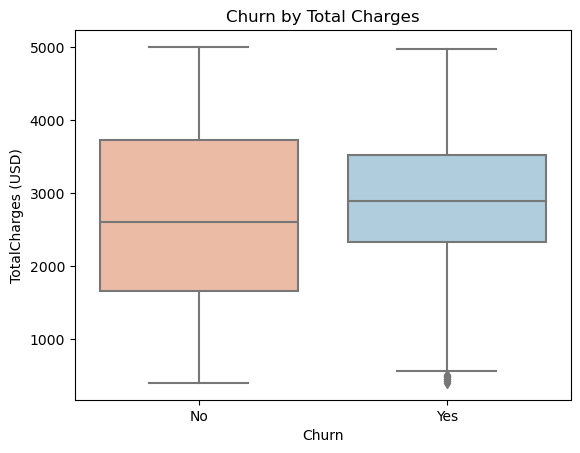

In [168]:
# Relationship between TotalCharges and Churn
sns.boxplot(x='Churn', y='TotalCharges (USD)', data=data2,palette='RdBu')
plt.title('Churn by Total Charges')
plt.show()


CommLink Telecom's churned customer had on average, hight total charges of around $3000. Again suggesting that the company's high prices might be the contributing factor to customers losing interest.

In [155]:
#5) Churn Prediction: Build a machine learning model (e.g., Logistic Regression, Random Forest) 
# to predict customer churn based on historical data.
# Tools: Python, Jupyter Notebook, Pandas, Matplotlib, Seaborn, Scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

DATASET=pd.read_csv('CommLink_Telecom_Customer_Data_Preprocessed.csv')

# Splitting the data into training and testing sets
X = DATASET.drop(['Churn_Yes','Churn_No'], axis=1) #These attributes are not features
y = DATASET['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80 % training & 20 % testing

# Using Logistic Regression 
logisticModel = LogisticRegression(solver='liblinear',random_state=42)

# Using Random Forest
rfModel = RandomForestClassifier(random_state=42)

# Training the models
logisticModel.fit(X_train, y_train)
rfModel.fit(X_train, y_train)

# Evaluating the models
def evaluateModel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("\nAccuracy:", round(accuracy,2),'%')
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n\n", class_report)

print("\n\n-----------------------------------> Logistic Regression Model Results:\n")
evaluateModel(logisticModel, X_test, y_test)

print("\n\n-----------------------------------> Random Forest Model Results:\n")
evaluateModel(rfModel, X_test, y_test)



-----------------------------------> Logistic Regression Model Results:


Accuracy: 0.77 %

Confusion Matrix:
 [[ 25  29]
 [ 17 130]]

Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.46      0.52        54
           1       0.82      0.88      0.85       147

    accuracy                           0.77       201
   macro avg       0.71      0.67      0.69       201
weighted avg       0.76      0.77      0.76       201



-----------------------------------> Random Forest Model Results:


Accuracy: 0.74 %

Confusion Matrix:
 [[ 31  23]
 [ 30 117]]

Classification Report:

               precision    recall  f1-score   support

           0       0.51      0.57      0.54        54
           1       0.84      0.80      0.82       147

    accuracy                           0.74       201
   macro avg       0.67      0.68      0.68       201
weighted avg       0.75      0.74      0.74       201



In [156]:
import pickle
# Saving Logistic Regression model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logisticModel, file)

# Saving Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfModel, file)


In [168]:
#6) Deployment: Deploy the churn prediction model as an API or integrate it into CommLink Telecom's system 
# to generate real-time churn predictions for individual customers. 
# This will allow them to take targeted actions to retain customers at risk of churn.
# # Client Name: CommLink Telecom
# Company Name: DataSense Solutions

from flask import Flask, request, jsonify, render_template
from sklearn.preprocessing import MinMaxScaler
import pickle
import pandas as pd

app = Flask(__name__)

def loadModels():
    try:
        with open('logistic_model.pkl', 'rb') as file:
            logisticModel = pickle.load(file)
        with open('random_forest_model.pkl', 'rb') as file2:
            rfModel = pickle.load(file2)
        return logisticModel, rfModel
    except Exception as e:
        print("Error loading models:", str(e))
        return None, None

logisticModel, rfModel = loadModels()

newData = { #This helps user test data to be predicted with ease as it has all the columns user won't enter
    'CustomerID':[100090,10097,18876],
    'Gender': ['Male','Female','Female'],
    'Age': [35,45,89],
    'ServiceLength (months)': [12,90,78],
    'ContractType': ['One-Year','Month-to-Month','Two-Year'],
    'MonthlyCharges (USD)': [70,89,90],
    'TotalCharges (USD)': [800,900,890]
}    

# Function for data preprocessing
def preprocessData(customerData):
    # Merging customerData with newData [that is user enteres]
    newData['CustomerID'].append(customerData['CustomerID'])
    newData['Gender'].append(customerData['Gender'])
    newData['Age'].append(customerData['Age'])
    newData['ServiceLength (months)'].append(customerData['ServiceLength (months)'])
    newData['ContractType'].extend(customerData['ContractType'])
    newData['MonthlyCharges (USD)'].append(customerData['MonthlyCharges (USD)'])
    newData['TotalCharges (USD)'].append(customerData['TotalCharges (USD)'])

    
    newData2 = pd.DataFrame(newData) #Converting to dataframe 
    # Converting categorical variables into numerical format using one-hot encoding
    newData2 = pd.get_dummies(newData2, columns=['Gender', 'ContractType'])

    # Performing min-max scaling on all relevant numerical columns 
    numCols = ['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']
    scaler = MinMaxScaler()
    newData2[numCols] = scaler.fit_transform(newData2[numCols])
    return newData2

# Will get model predictions & clarify them:
def getPredictions(model, data):
    predictions = model.predict(data)
    #Shows model results with more clarity
    ans=[]
    for i in range (len(predictions)): 
        if(predictions[i]==1):
            show='Customer ID '+str(data['CustomerID'][i])+' CHURN YES'
            print(show)
            ans.append(show)
        else:
            show2='Customer ID '+str(data['CustomerID'][i])+' CHURN NO'
            print(show2)
            ans.append(show2)
    #only last data is user entered so only that will be returned the rest is old test data
    ans=[ans[3]]
    return ans

@app.route('/', methods=['GET', 'POST'])
def predictChurn():
    if request.method == 'GET':
        # Rendering the HTML form for user input
        return render_template('churn_prediction_form.html')

    if request.method == 'POST':
        try:
            # Getting the user entered customer data from the request form
            customerData = {
                'CustomerID': request.form.get('customer_id'),
                'Gender': request.form.get('gender'),
                'Age': float(request.form.get('age')),
                'ServiceLength (months)': float(request.form.get('service_length')),
                'ContractType': [
                    value for value in [
                        request.form.get('contract_type'),
                        request.form.get('contract_type_1'),
                        request.form.get('contract_type_2')] if value],
                'MonthlyCharges (USD)': float(request.form.get('monthly_charges')),
                'TotalCharges (USD)': float(request.form.get('total_charges'))
            }

            # Preprocessing the data
            data = preprocessData(customerData)
            
            # Making predictions using the logistic regression model
            logisticPredictions = getPredictions(logisticModel, data)

            # Making predictions using the random forest model
            rfPredictions = getPredictions(rfModel, data)

            # Returning the predictions as a JSON response
            return jsonify({
                'Logistic Regression Predictions': logisticPredictions,
                'Random Forest Predictions': rfPredictions
            })
            
        except Exception as e:
            return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, port=8000, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [26/Jul/2023 14:05:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Jul/2023 14:06:26] "POST / HTTP/1.1" 200 -


Customer ID 100090 CHURN YES
Customer ID 10097 CHURN YES
Customer ID 18876 CHURN YES
Customer ID 12005 CHURN YES
Customer ID 100090 CHURN YES
Customer ID 10097 CHURN YES
Customer ID 18876 CHURN YES
Customer ID 12005 CHURN YES


In [ ]:
#7) Project Outcome: The final deliverables will include a Jupyter Notebook documenting the data analysis 
# and modeling process, a report summarizing insights into churn factors,
# and the deployed churn prediction model. 
# DataSense Solutions will provide recommendations for churn reduction strategies based on the model's insights.